# Pleque - impact angle and related functionality demonstration

Branch feature/filedline_spreading

In [ ]:
%pylab notebook 

In [ ]:
# WIP: 
import sys
sys.path.append('C:\\Users\\Ondrej\\Projects\\pleque\\')

In [ ]:
from pleque.io.compass import cudb
from pleque.tests.utils import load_testing_equilibrium
from pleque.core.coordinates import Coordinates
import matplotlib.pyplot as plt
import numpy as np


import matplotlib as mpl

mpl.rcParams['font.size']=12
mpl.rcParams['font.weight']='bold'
mpl.rcParams['axes.linewidth']=2
mpl.rcParams['axes.labelsize']=12
mpl.rcParams['axes.labelweight']='bold'
mpl.rcParams['lines.linewidth']=2

In [ ]:
# If the first wall is not specified IBA v3.1 limiter is used. 
eq = load_testing_equilibrium(4)

In [ ]:
eq.plot_overview()
plt.show()

<IPython.core.display.Javascript object>


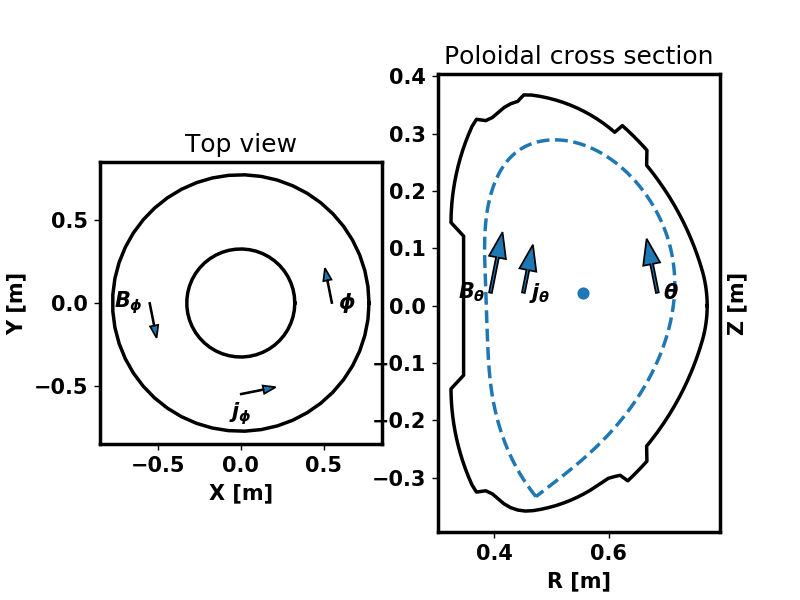

<IPython.core.display.Javascript object>


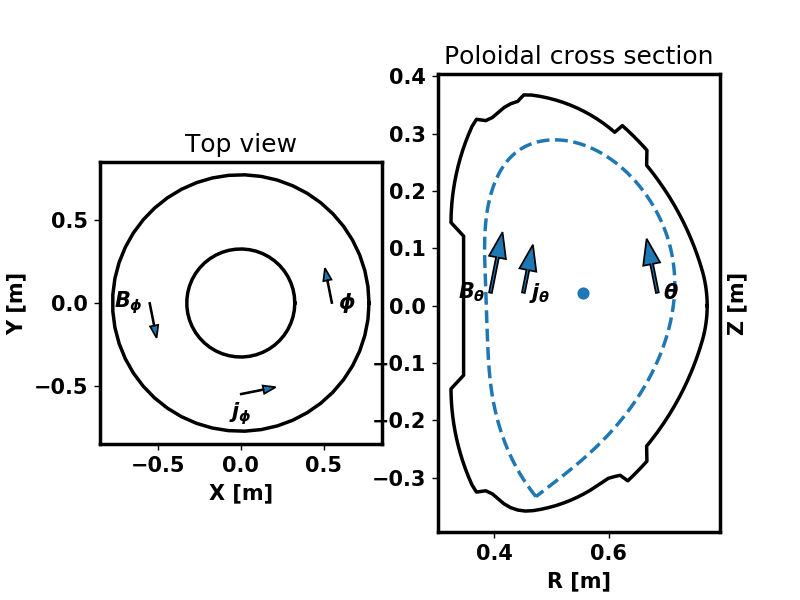

In [6]:
# You can see, there is wrong geometry in the database at the moment: 
eq.plot_geometry()

In [7]:
# Coordinates instance of first wall: 
fw = eq.first_wall

# Midplane separatrix-lcfs distance: 
r_mid = eq.r_mid(psi_n = 1, grid=False)
mapped_clearance = fw.r_mid - r_mid


<IPython.core.display.Javascript object>


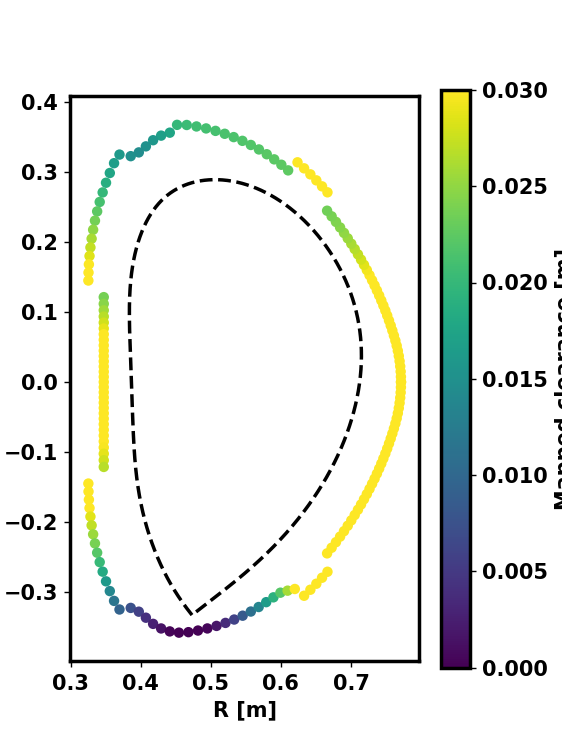

Text(0.5, 0, 'R [m]')

In [8]:
opts = {'vmin': 0, 'vmax': 0.03, 'edgecolors': 'none'}

#ax = axs[0]
plt.figure(figsize=(4.5,6))
ax = plt.gca()

# plot LCFS: 
eq.lcfs.plot(color='k', ls='--')
cl = ax.scatter(fw.R, fw.Z, c=mapped_clearance, **opts)
im = plt.colorbar(mappable=cl, ax=ax, label='Mapped clearance [m]')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')



## Magnetic field on the FW: 

In [9]:
B_wall = eq.B_abs(fw)


<IPython.core.display.Javascript object>


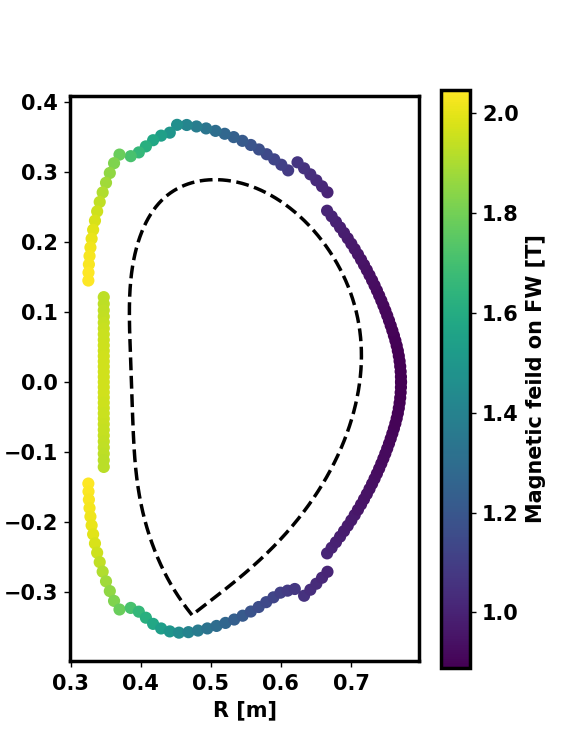

Text(0.5, 0, 'R [m]')

In [10]:
plt.figure(figsize=(4.5,6))
ax = plt.gca()

# plot LCFS: 
eq.lcfs.plot(color='k', ls='--')
# opts = {'vmin': 6.0, 'vmax': 10.0, 'edgecolors': 'none'}
cl = ax.scatter(fw.R, fw.Z, c=B_wall)
im = plt.colorbar(mappable=cl, ax=ax, label='Magnetic feild on FW [T]')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

## Refine the wall using the new methon of resampling: 



In [11]:
first_wall=eq.first_wall


#number of points to resample the limiter
npoints=1000



coords=Coordinates(eq,np.vstack((first_wall.R,first_wall.Z)).T)

# Resample using new method
coords2=coords.resample2(npoints)

print(dir(coords2))

#just for plotting
newpoints=np.vstack((coords2.R,coords2.Z))

# test area

['R', 'X', 'Y', 'Z', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_convert_to_default_coord_type', '_coord_type_input', '_eq', '_evaluate_input', '_incompatible_dimension_error', '_valid_coordinates', '_valid_coordinates_1d', '_valid_coordinates_2d', '_valid_coordinates_3d', '_verify_coord_type', '_x1_input', '_x2_input', 'as_array', 'cocos', 'cocos_dict', 'cum_length', 'dim', 'dists', 'grid', 'impact_angle_cos', 'intersection', 'length', 'mesh', 'normal_vector', 'phi', 'plot', 'pol_projection_impact_angle_cos', 'psi', 'psi_n', 'r', 'r_mid', 'resample', 'resample2', 'rho', 'theta', 'x1', 'x2']


 ## Calculate cosinus of impact angle

In [12]:
# get normal vector
normal_vecs=coords2.normal_vector().T

# get normalised bvec
bvec=eq.Bvec_norm(coords2)

vec=np.linspace(0,0.2,2)

# get impact angle cosinus

impcos=coords2.impact_angle_cos()

#get only poloidal projection

# get impact angle cosinus

impcospol=coords2.pol_projection_impact_angle_cos()


(3, 999)


In [13]:
## Display limiter normal angles vs impact angles

<IPython.core.display.Javascript object>


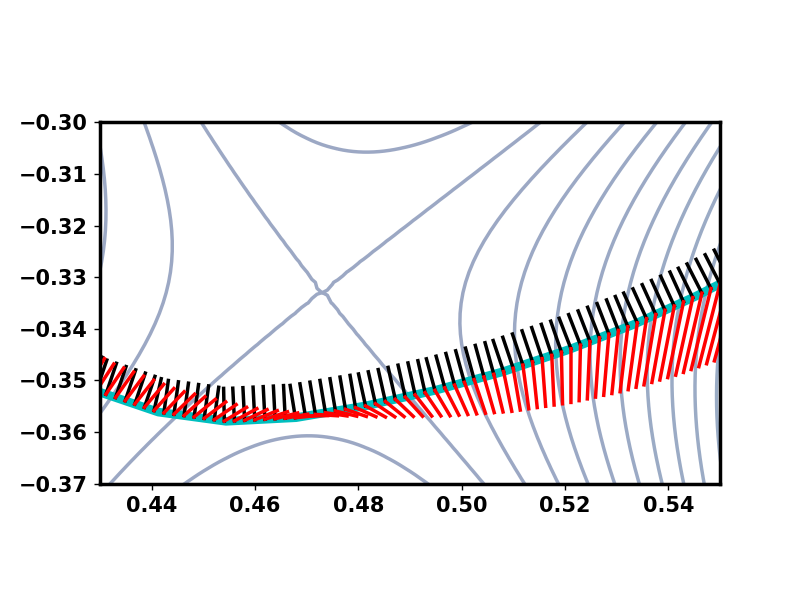

(2, 1000)


(-0.37, -0.3)

In [14]:
fign,axn=plt.subplots()

axn.plot(first_wall.R,first_wall.Z,lw=5,color='c')

axn.set_aspect('equal')
    
newpoints=np.vstack((coords2.R,coords2.Z))
print(np.shape(newpoints))

#plot normal vectors
for i in range(0,npoints-1):
    axn.plot(coords2.R[i]+normal_vecs[0,i]*vec,coords2.Z[i]+normal_vecs[1,i]*vec,color='k')
    
#plot b vectors
    
for i in range(0,npoints-1):
    axn.plot(coords2.R[i]+bvec[0,i]*vec,coords2.Z[i]+bvec[1,i]*vec,color='r')
    

grid = eq.grid(resolution=[1e-3, 2e-3], dim="step")

cl = axn.contour(grid.R, grid.Z, grid.psi_n, 400, alpha=0.5)

axn.set_xlim(0.43,0.55)
axn.set_ylim(-0.37,-0.3)

## Display limiter impact angle cosine

<IPython.core.display.Javascript object>


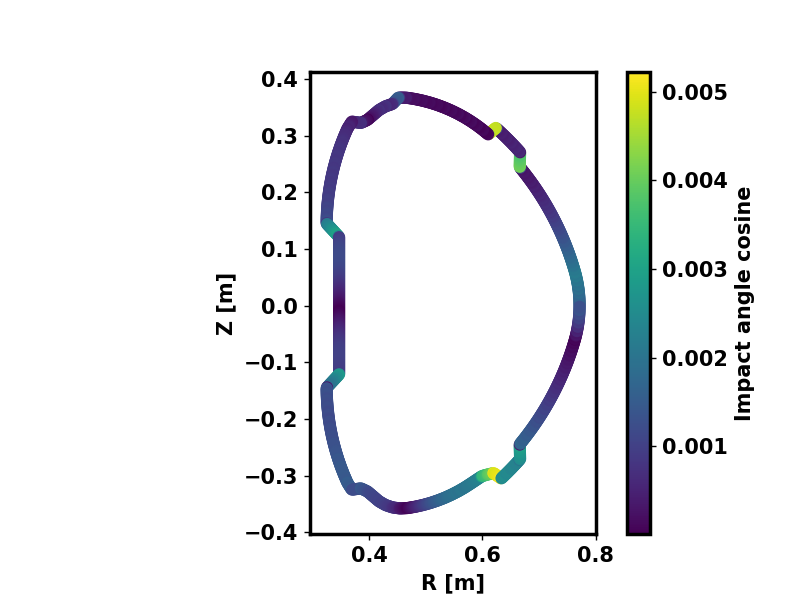

In [20]:
fig,ax=plt.subplots()

ax.set_aspect('equal')
#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))

cl = ax.scatter(coords2.R[:-1], coords2.Z[:-1], c=np.abs(impcos))
im = plt.colorbar(mappable=cl, ax=ax, label='Impact angle cosine')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

plt.show()

<IPython.core.display.Javascript object>


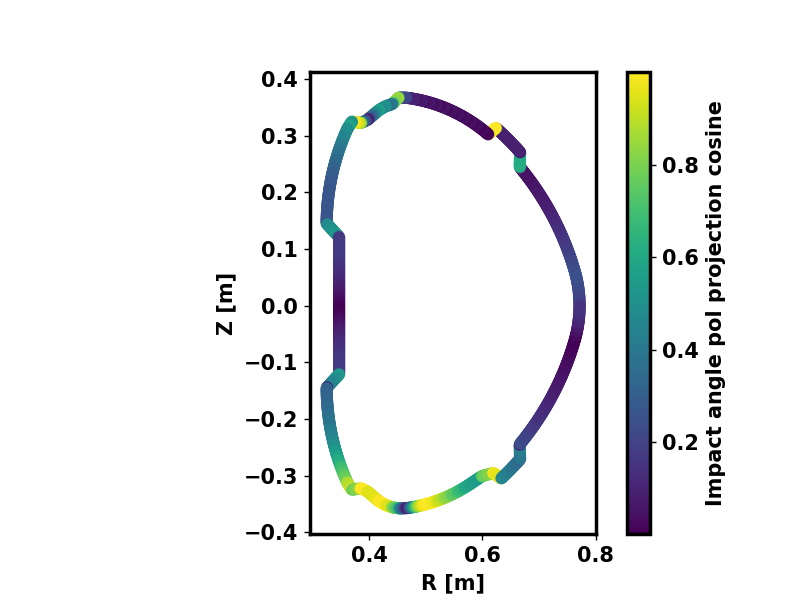

In [21]:
fig,ax=plt.subplots()

ax.set_aspect('equal')
#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))

cl = ax.scatter(coords2.R[:-1], coords2.Z[:-1], c=np.abs(impcospol))
im = plt.colorbar(mappable=cl, ax=ax, label='Impact angle pol projection cosine')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

plt.show()

In [16]:
# full field
ratio=eq.outter_parallel_fl_expansion_coef(coords2)
# poloidal field only
ratio2=eq.outter_poloidal_fl_expansion_coef(coords2)

<IPython.core.display.Javascript object>


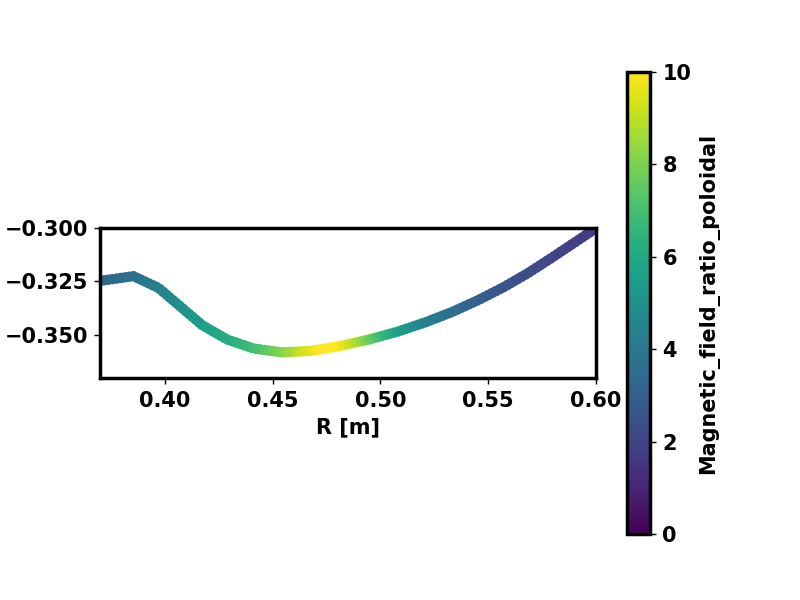

<IPython.core.display.Javascript object>


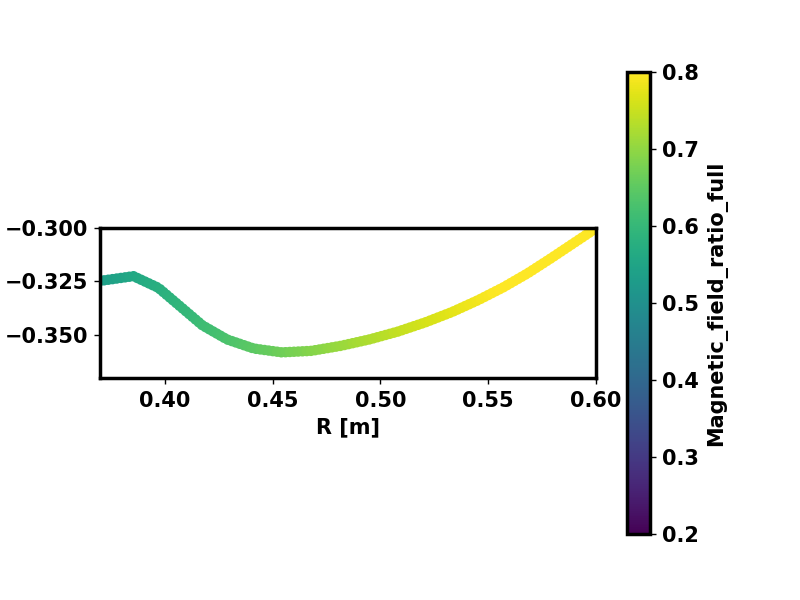

In [22]:
fig,ax=plt.subplots()

ax.set_aspect('equal')

#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))
opts = {'vmin': 0, 'vmax': 10, 'edgecolors': 'none'}

cl = ax.scatter(coords2.R, coords2.Z, c=1./ratio2, **opts)
im = plt.colorbar(mappable=cl, ax=ax, label='Magnetic_field_ratio_poloidal')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

ax.set_xlim(0.37,0.6)
ax.set_ylim(-0.37,-0.3)

plt.show()


fig,ax=plt.subplots()

ax.set_aspect('equal')

#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))
opts = {'vmin': 0.2, 'vmax': 0.8, 'edgecolors': 'none'}

cl = ax.scatter(coords2.R, coords2.Z, c=1./ratio, **opts)
im = plt.colorbar(mappable=cl, ax=ax, label='Magnetic_field_ratio_full')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

ax.set_xlim(0.37,0.6)
ax.set_ylim(-0.37,-0.3)

plt.show()

In [24]:
flux_exp_coef=ratio[:-1]*np.abs(impcos)

<IPython.core.display.Javascript object>


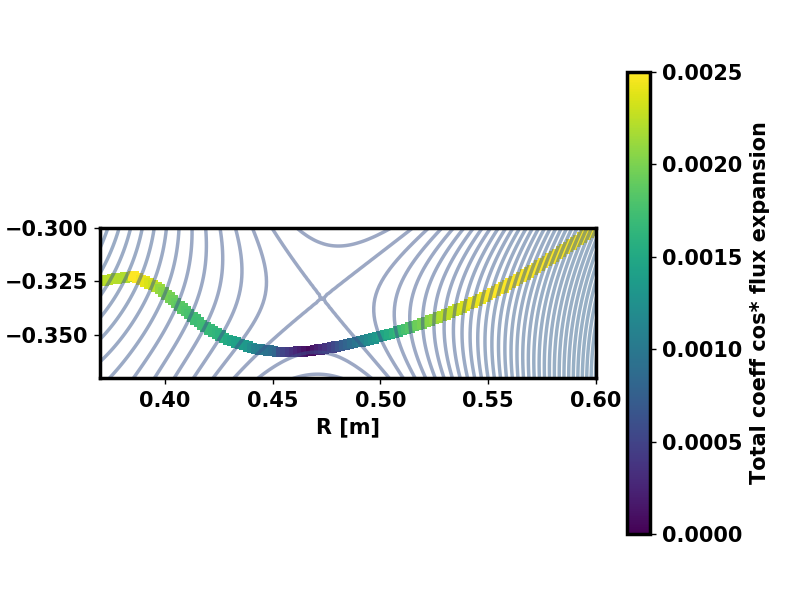

In [25]:
fig,ax=plt.subplots()

ax.set_aspect('equal')
#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))
opts = {'vmin': 0, 'vmax': 0.0025, 'edgecolors': 'none'} #

cl = ax.scatter(coords2.R[:-1], coords2.Z[:-1], c=flux_exp_coef,marker='s',**opts)
im = plt.colorbar(mappable=cl, ax=ax, label='Total coeff cos* flux expansion')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

ax.set_xlim(0.37,0.6)
ax.set_ylim(-0.37,-0.3)

ax.contour(grid.R, grid.Z, grid.psi_n, 600, alpha=0.5)

plt.show()

In [26]:
flux_exp_coef=ratio2[:-1]*np.abs(impcospol)

<IPython.core.display.Javascript object>


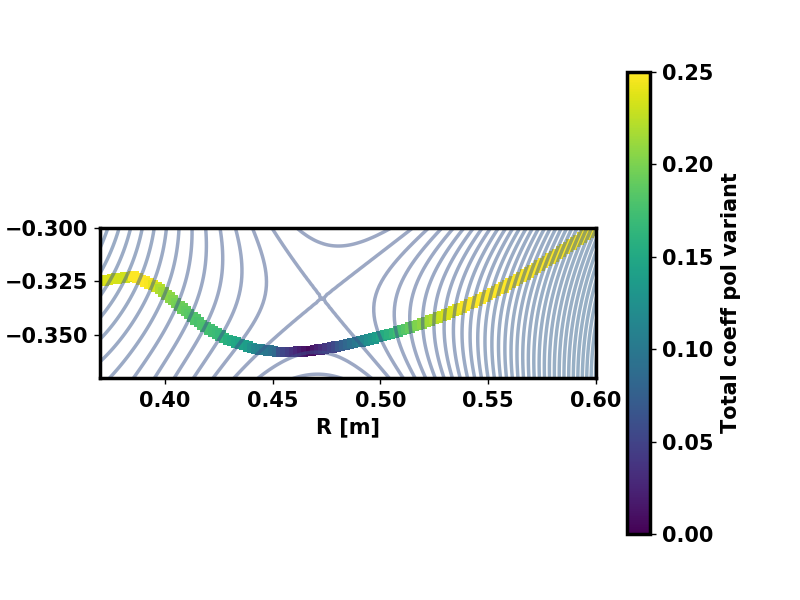

In [30]:
fig,ax=plt.subplots()

ax.set_aspect('equal')
#cmap=plt.get_cmap('jet')

#norm_cos=(impcos-np.amin(impcos))/(np.amax(impcos)-np.amin(impcos))
opts = {'vmin': 0, 'vmax': 0.25, 'edgecolors': 'none'} #

cl = ax.scatter(coords2.R[:-1], coords2.Z[:-1], c=flux_exp_coef,marker='s',**opts)
im = plt.colorbar(mappable=cl, ax=ax, label='Total coeff pol variant')
ax.set_aspect('equal')
ax.set_ylabel('Z [m]')
ax.set_xlabel('R [m]')

ax.set_xlim(0.37,0.6)
ax.set_ylim(-0.37,-0.3)

ax.contour(grid.R, grid.Z, grid.psi_n, 600, alpha=0.5)

plt.show()